# **Projeto Final do módulo Python para Ánalise de Dados**
#### Aluna: Rafaela Eufrasio de Paula


## 1. Descrição do problema

O projeto tem como objetivo analisar um conjunto de dados de crédito contendo informações de clientes adimplentes e inadimplentes, a fim de identificar os principais fatores que podem influenciar a inadimplência. Utilizando Python para tratamento e análise dos dados, com o objetivo de entender padrões relacionados ao não pagamento, considerando atributos como renda mensal, escolaridade, idade, estado civil, entre outros. A partir dessa análise, pretende-se oferecer insights que possam auxiliar instituições financeiras a prever e mitigar riscos de crédito de forma mais eficiente.

## 2. Exploração dos dados

O atributo principal de interesse, `default`, é conhecido como **variável dependente**. Já os demais atributos, como `idade`, `salário`, entre outros que ajudam a explicar ou prever o comportamento da variável `default`, são chamados de **variáveis independentes** ou também **variáveis preditoras**.


Abaixo segue uma descrição das variáveis:


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | Indica o número de dependentes |
| escolaridade | Grau de escolaridade |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


### 2.1 Carregamento dos dados

Vamos começar lendo os dados num `DataFrame` do Pandas.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/python-m10/Python_M10_support material.csv', na_values='na')

In [3]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## 2.2 Estrutura

Em seguida vamos ver a estrutura dos dados. 

In [4]:
df.shape

(10127, 16)

### Acima podemos ver que o comando `df.shape` nos mostra o número de linhas e colunas (respectivamente).

### A

In [5]:
# A número de linhas e colunas para o default = 0 (clientes adimplentes)
df[df['default'] == 0].shape

(8500, 16)

### B

In [6]:
# B número de linhas e colunas para o default = 1 (clientes inadimplentes)
df[df['default'] == 1].shape

(1627, 16)

### Acima podemos ver o número de linhas e colunas dos cliente adimplentes (A) e inadimplentes (B).

In [7]:
quant_total, _ = df.shape
quant_adimplentes , _ = df[df['default']==0].shape
quant_inadimplentes, _ = df[df['default']==1].shape

In [8]:
print(f"A proporcão clientes adimplentes é de {round(100 * quant_adimplentes / quant_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * quant_inadimplentes / quant_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


## 2.2 Schema

### Aqui vamos ver com quais tipos de daods estamos trabalhando. 

In [9]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Abaixo temos as colunas e seus tipos de dados:

In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### Aqui podemos ver os atributos **categoricos**:

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


### Aqui podemos ver os atributos **numéricos**:

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 2.3 Dados Faltantes

### Um passo improtanto é verificar os dados faltantes que podem ser: 
- Vazios (`""`)
- Nulos (`None`)
- Não disponíveis (`na`,`NA`)
- não numéricos (`nan`,`NaN`,`NAN`)

In [13]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Abaixo podemos verificar quais colunas possuem dados faltantes:

In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

### A função abaixo levanta estatísticas referente as colunas dos dados faltantes:

In [15]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd,'porcentagem': round(100 * qtd/total,2 )}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [16]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [17]:
def stats_dados_faltantes(df: pd.DataFrame) -> pd.DataFrame:
    stats = []
    for col in df.columns:
        if df[col].isna().any():
            qtd = df[col].isna().sum()
            total = len(df)
            stats.append([col, qtd, round(100 * qtd / total, 2)])
    return pd.DataFrame(stats, columns=['coluna', 'quantidade', 'porcentagem'])

In [18]:
stats_dados_faltantes(df=df)

,coluna,quantidade,porcentagem
0,escolaridade,1519,15.00
1,estado_civil,749,7.40
2,salario_anual,1112,10.98


In [19]:
stats_dados_faltantes(df=df[df['default'] ==0])

,coluna,quantidade,porcentagem
0,escolaridade,1263,14.86
1,estado_civil,620,7.29
2,salario_anual,925,10.88


In [20]:
stats_dados_faltantes(df=df[df['default'] == 1])

,coluna,quantidade,porcentagem
0,escolaridade,256,15.73
1,estado_civil,129,7.93
2,salario_anual,187,11.49


## 3. Transformação e Limpeza dos Dados


### A etapa de limpeza dos dados tem como o objetivo corrigir inconsistências, tratar valores ausentes e garantir que o conjunto de dados estejam adequado para a análise. As ações incluíram a remoção ou imputação de valores nulos, padronização de tipos de dados e exclusão de registros ou colunas irrelevantes. Essa etapa é essencial para assegurar a qualidade das análises e a confiabilidade dos resultados obtidos.

### Abaixo podemos ver que `limite_credito` e `valor_transacoes_12m` estão sendo interpretaods como atributos catregóricos. 

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [22]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


## 3.1 Correção do *Schema*
### Aqui foi criada uma função `lambda` para limpar os dados. 

In [23]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)


['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


### A seguir aplicamos a função nas colunas de interesse.

In [24]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

### Aqui vemos novamente o *schema*:

In [25]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

### Atributos categóricos:

In [26]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


### Atributos numéricos:

In [27]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## 3.2 Remoção dos dados faltantes
#### O próximo passo é remover os dados faltantes.
#### A identificação e o tratamento de dados faltantes são fundamentais na análise com pandas, pois garantem a integridade dos resultados e evitam distorções nas conclusões estatísticas.

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(7081, 16)

In [30]:
df[df['default'] == 0].shape

(5968, 16)

In [31]:
df[df['default'] == 1].shape

(1113, 16)

In [32]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [33]:
print(f"A proporcão adimplentes ativos é de {round(100 * quant_adimplentes / quant_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * quant_inadimplentes / quant_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4. Visualização dos dados
#### A visualização de dados é uma etapa fundamental da análise, pois transforma os dados em representações gráficas que facilitam a identificação de padrões, tendências e insights de forma clara e rápida.

#### Vamos dar inicio importando as bibliotecas necessárias e separando os clientes inadimplentes dos clientes adimplentes. 

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [35]:
df_adimplete = df[df['default'] ==0]

In [36]:
df_inadimplente = df[df['default'] == 1]

## 4.1 Visualização Categórica
#### Aqui vamos visualizar a relação entre a variável dependente com os atribitos categóricos.

In [37]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


### 4.1.1 Escolaridade

In [38]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

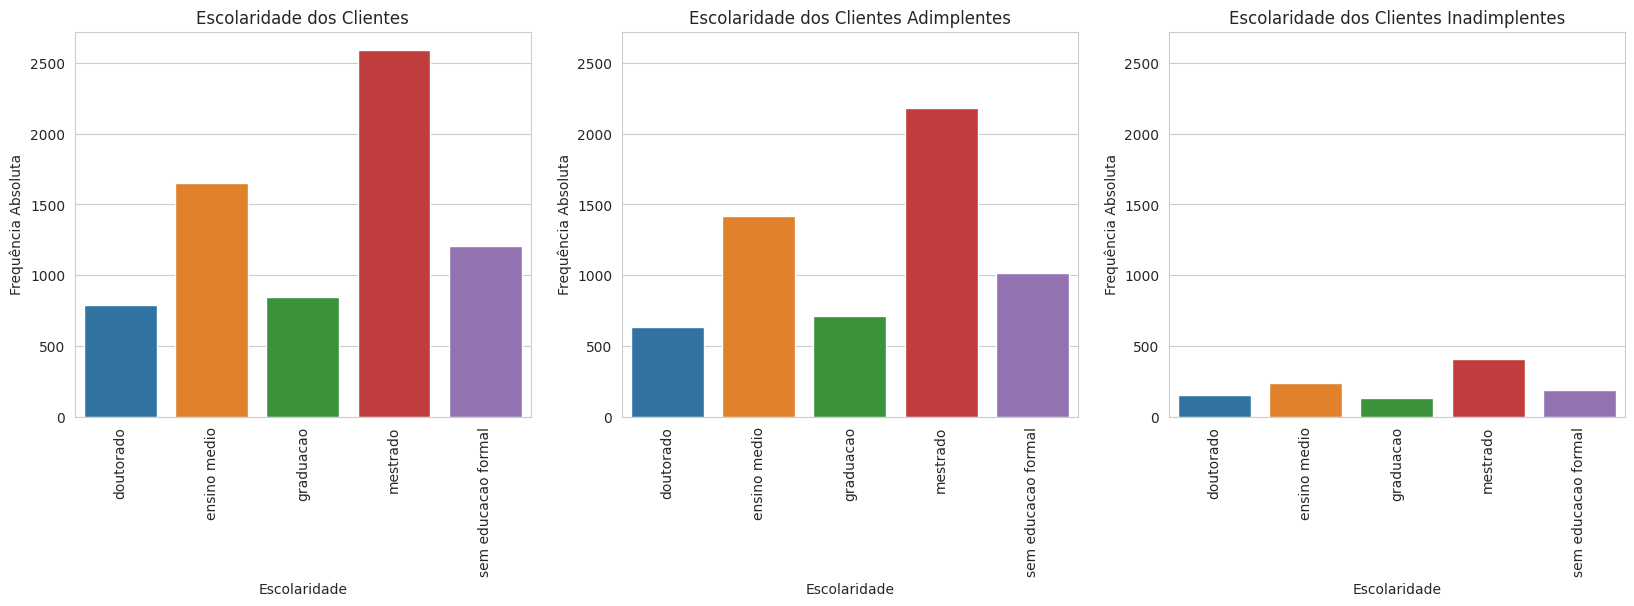

In [39]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0 
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)


    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figure.show()

### 4.1.2 Salário Anual

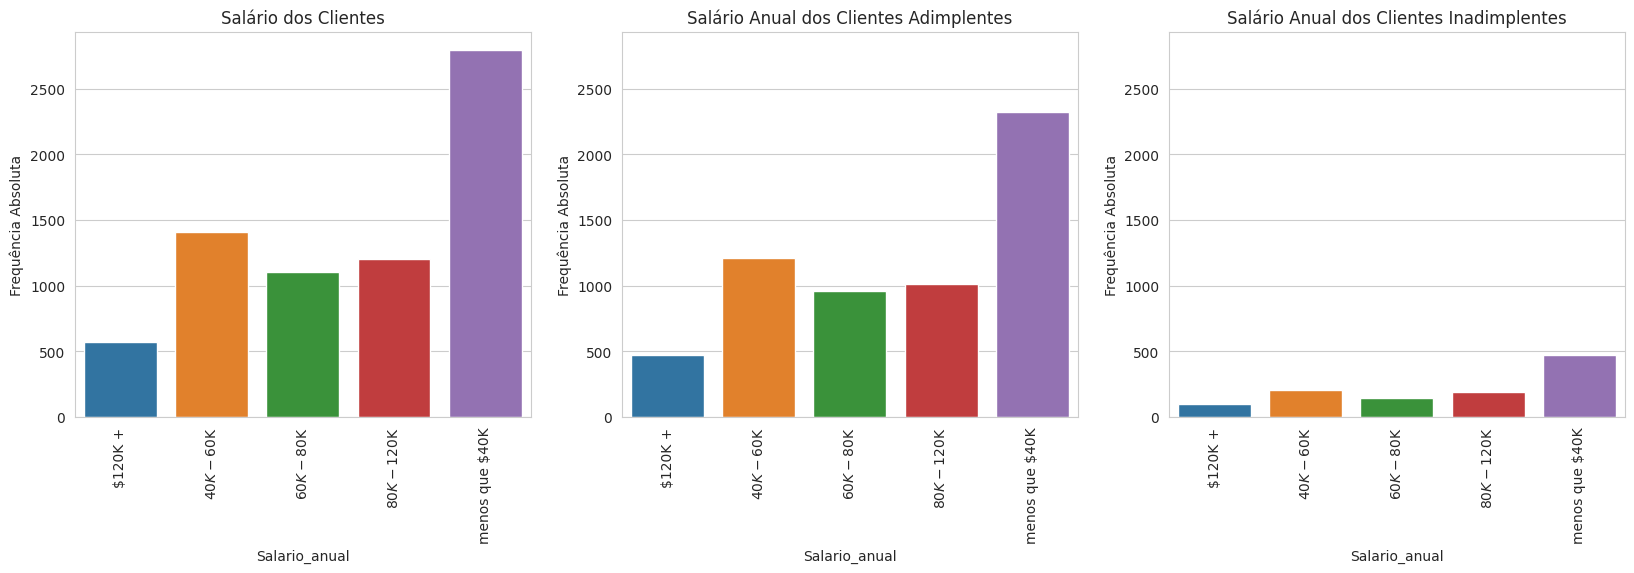

In [40]:
coluna = 'salario_anual'
titulos = ['Salário dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0 
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)


    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figure.show()

### 4.1.3 Estado Civil

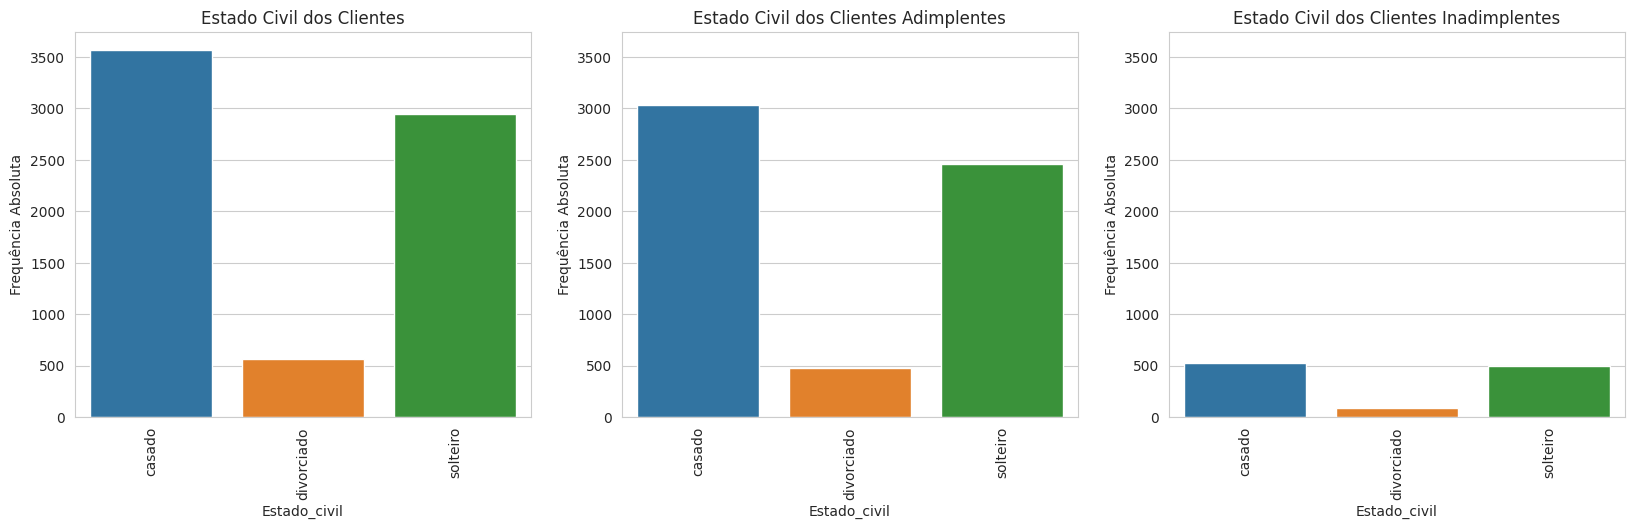

In [41]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0 
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)


    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figure.show()

### 4.1.4 Gênero

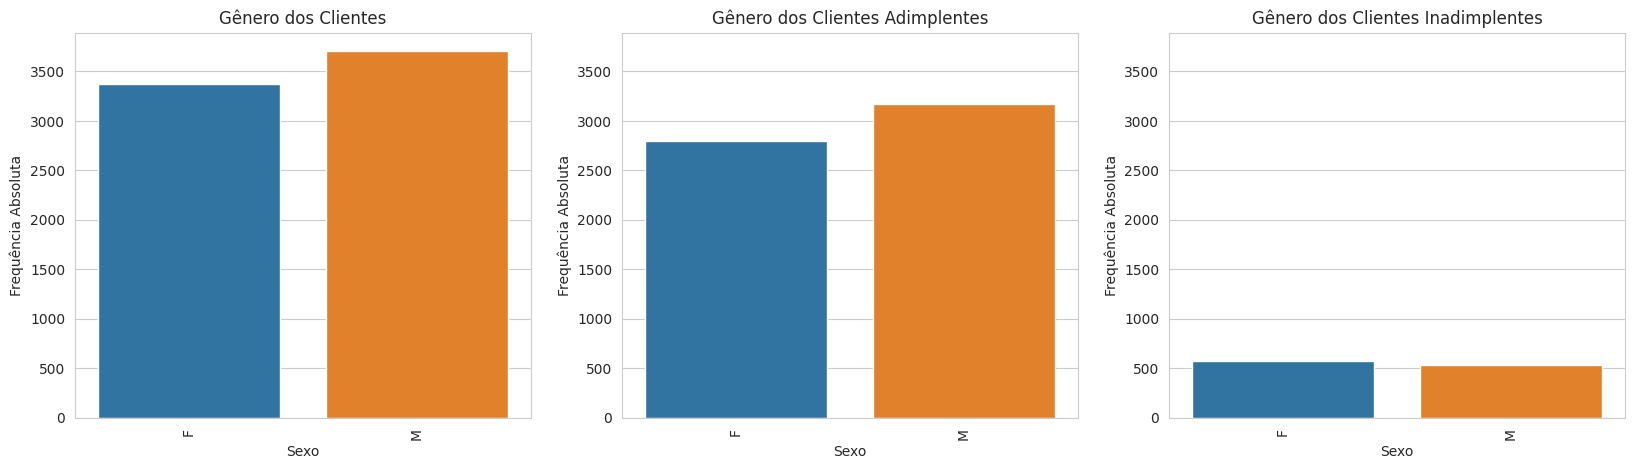

In [42]:
coluna = 'sexo'
titulos = ['Gênero dos Clientes', 'Gênero dos Clientes Adimplentes', 'Gênero dos Clientes Inadimplentes']

eixo = 0 
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)


    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figure.show()

### 4.1.5 Tipo de Cartão dos Clientes

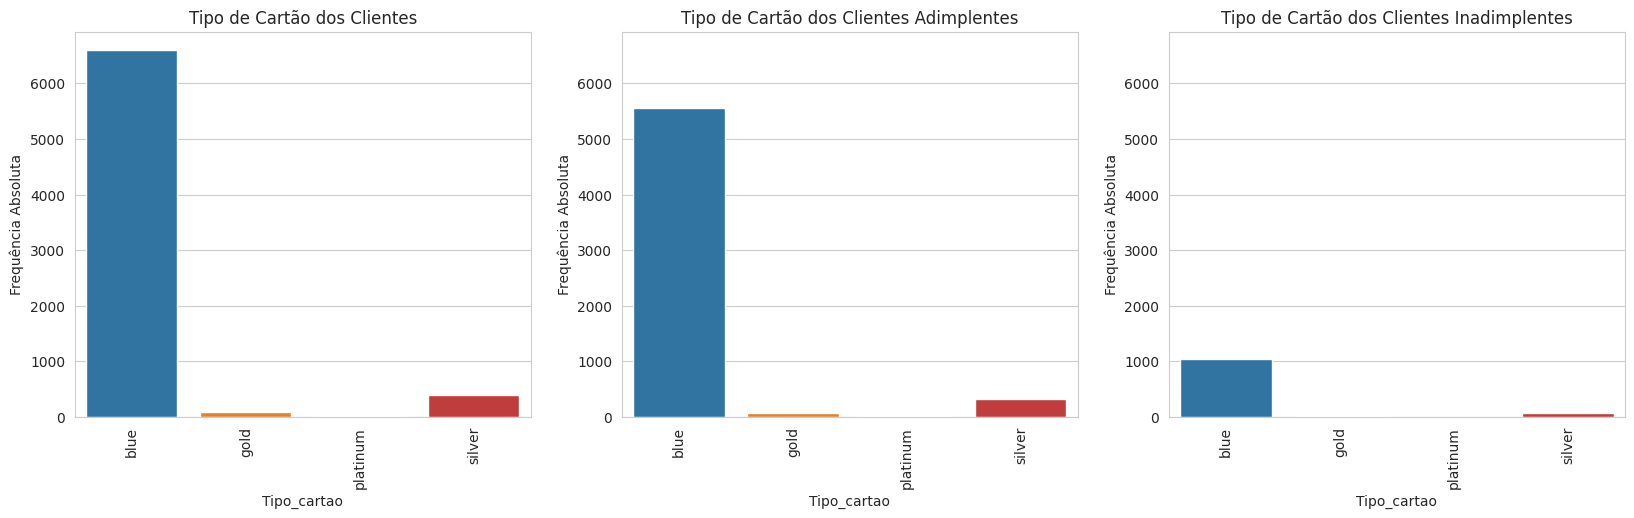

In [43]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0 
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)


    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figure.show()

## 4.2 Visualização Numérica

In [44]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


#### A Seguir temos uma analise descritiva dos atributos numéricos

In [45]:
df_numerico = df.drop(['id', 'default'], axis=1).select_dtypes('number')
df_numerico.describe().round(2)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00
mean,46.35,2.34,35.98,3.82,2.45,2.34,8493.26,4394.80,64.50
std,8.04,1.29,8.00,1.54,1.10,1.00,9126.08,3468.46,23.81
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.00,510.16,10.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2498.35,2089.63,44.00
50%,46.00,2.00,36.00,4.00,2.00,2.00,4287.22,3831.09,67.00
75%,52.00,3.00,40.00,5.00,3.00,3.00,10729.40,4740.51,80.00
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.99,17995.49,134.00


### 4.2.1 Quantidade de Transações nos Últimos 12 Meses

In [46]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


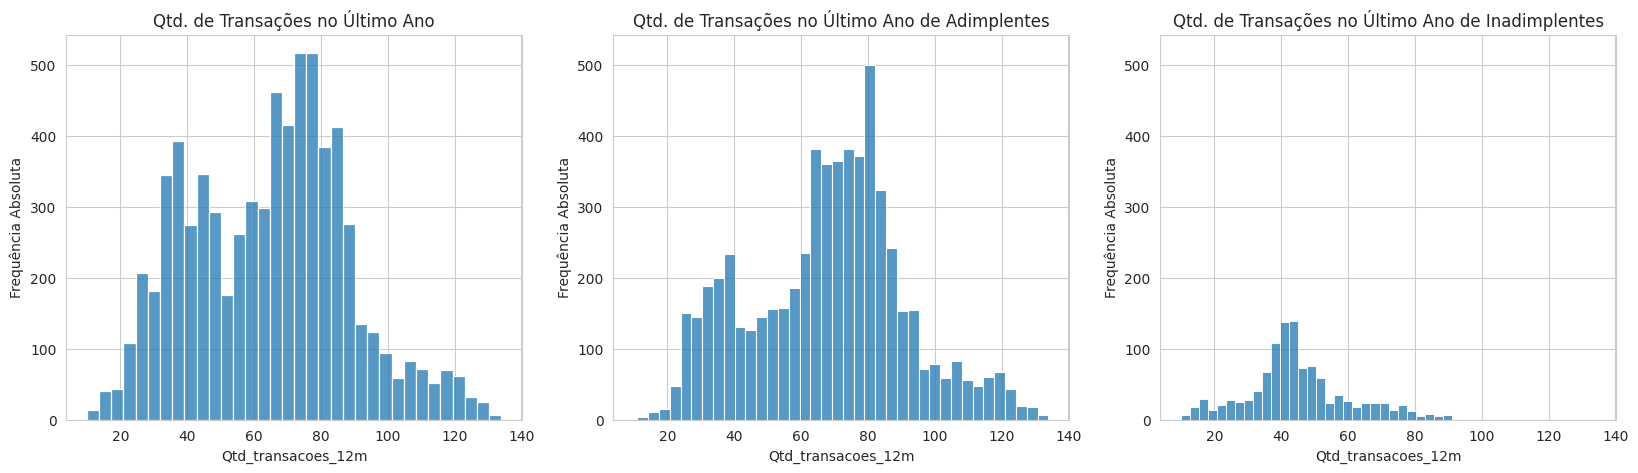

In [47]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.2 Valor das Transações nos Últimos 12 Meses

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


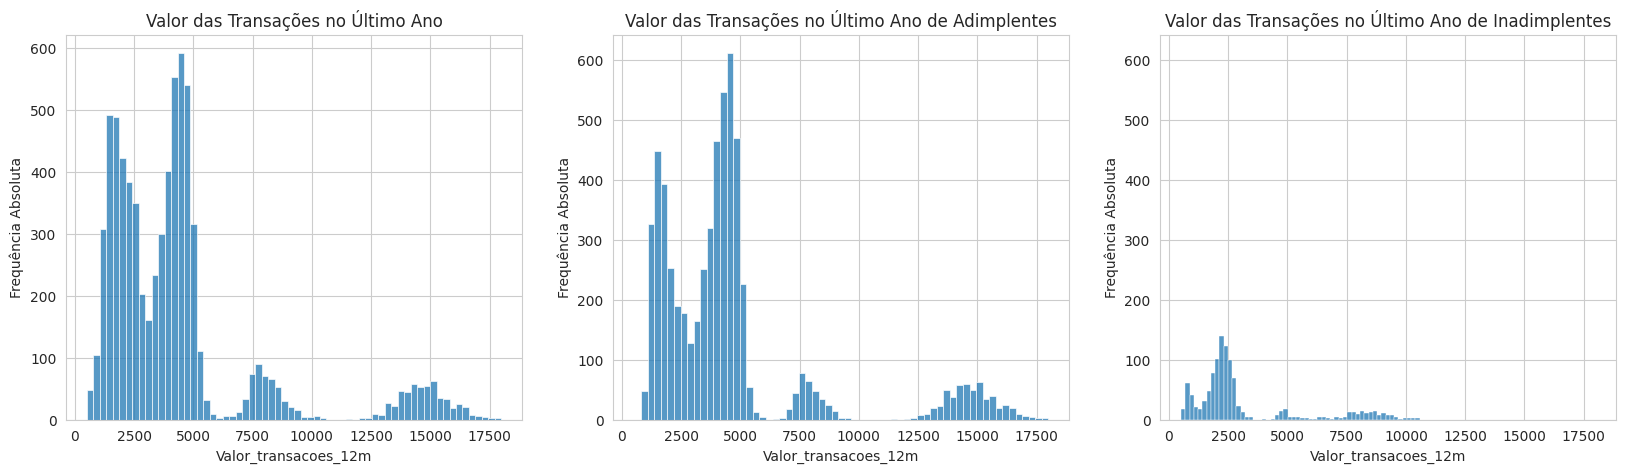

In [48]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.3 Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

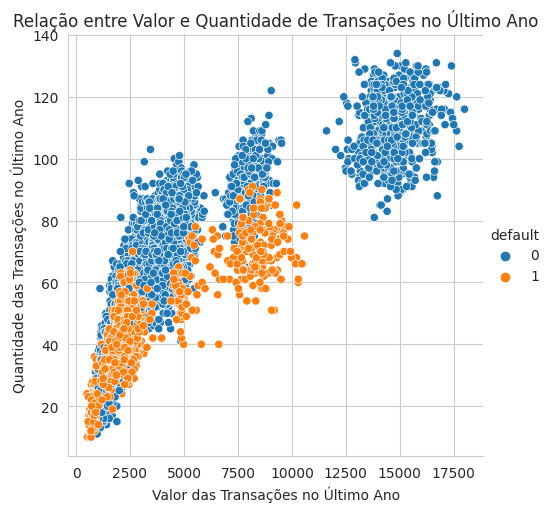

In [49]:
f = sns.relplot(x='valor_transacoes_12m',y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title = 'Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel = 'Valor das Transações no Último Ano',
    ylabel = 'Quantidade das Transações no Último Ano'
)

### 4.2.4 Limite de Créditos dos Clientes

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


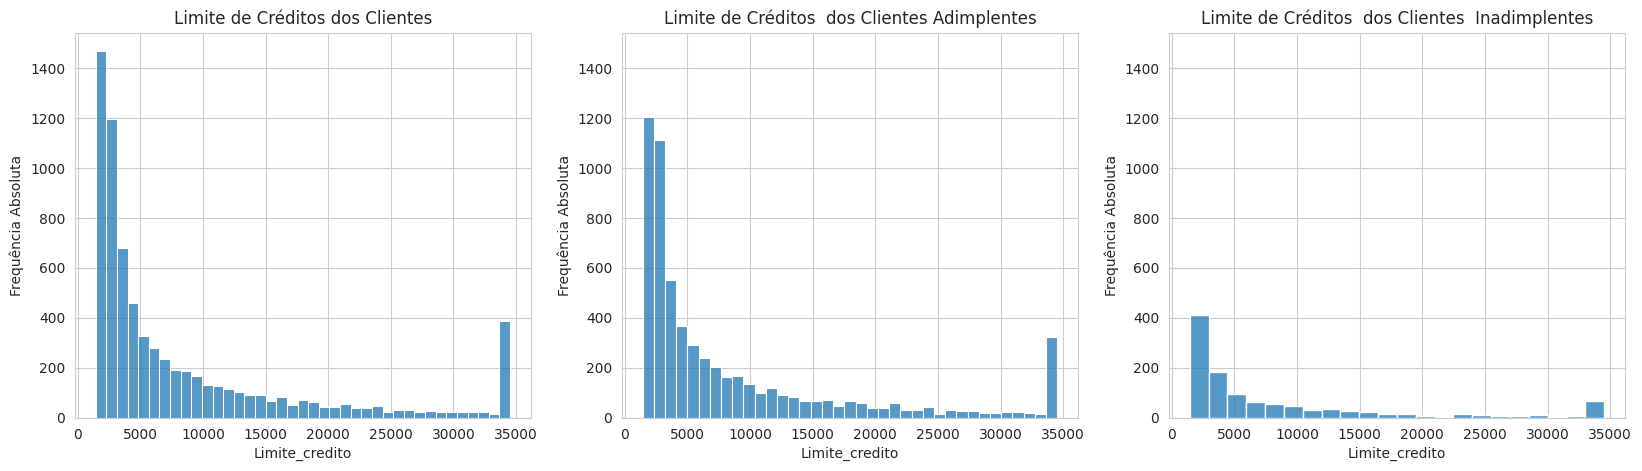

In [50]:
coluna = 'limite_credito'
titulos = ['Limite de Créditos dos Clientes', 'Limite de Créditos  dos Clientes Adimplentes', 'Limite de Créditos  dos Clientes  Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.5 Idade dos Clientes


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


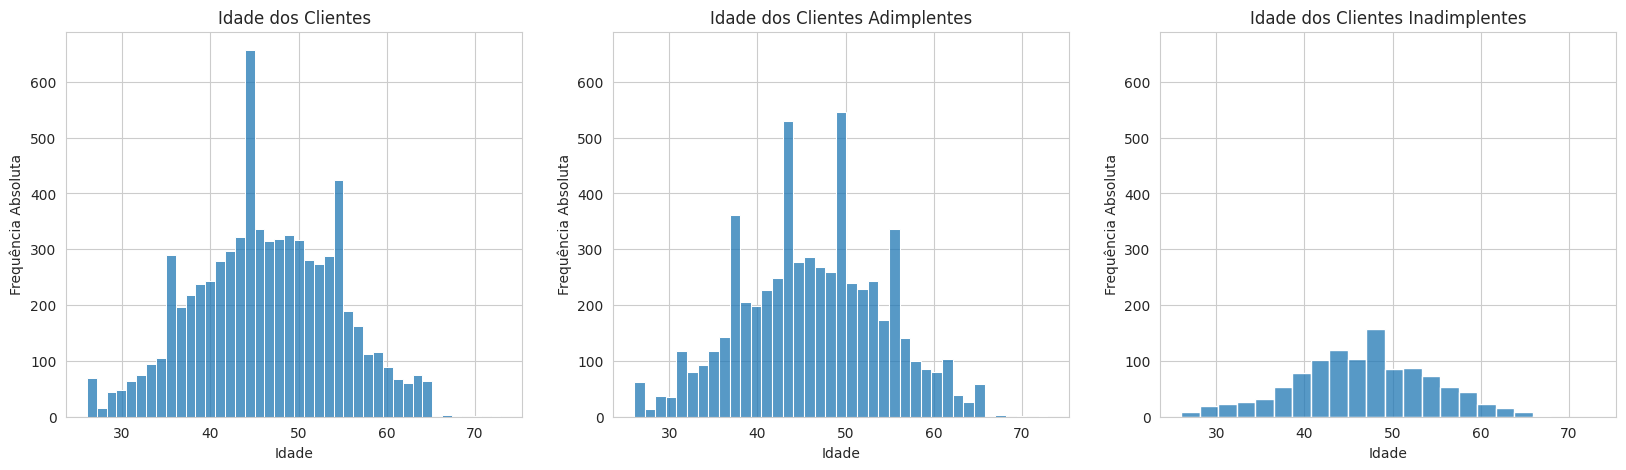

In [51]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()


### 4.2.6 Número de Pessoas Dependentes Associadas ao Cliente

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


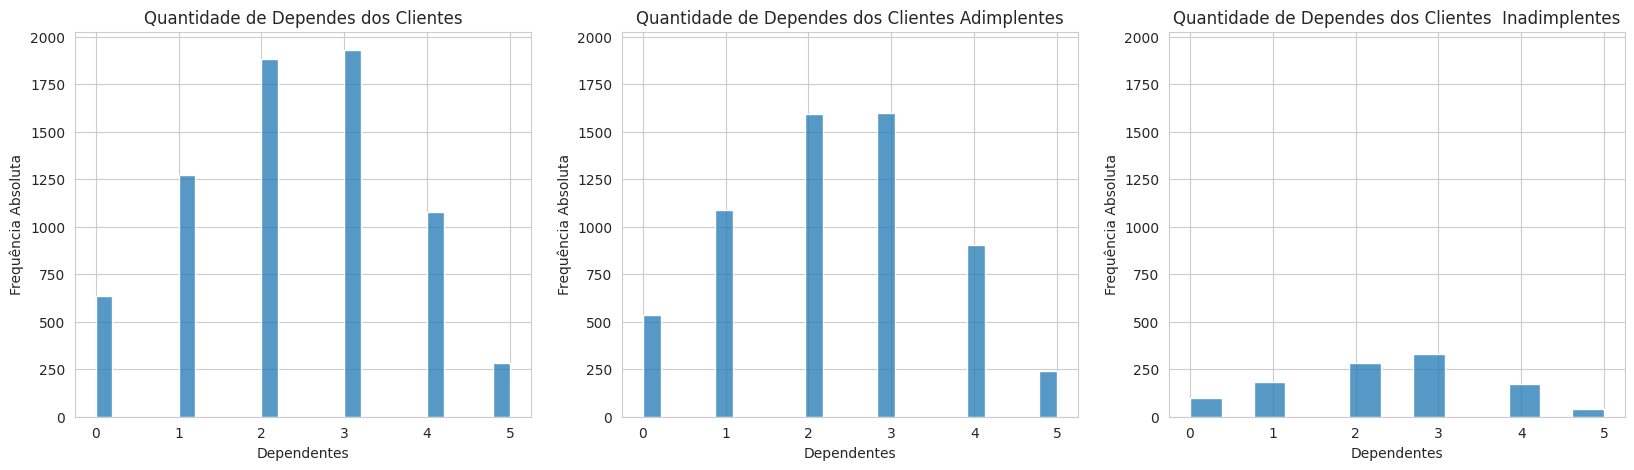

In [52]:
coluna = 'dependentes'
titulos = ['Quantidade de Dependes dos Clientes', 'Quantidade de Dependes dos Clientes Adimplentes', 'Quantidade de Dependes dos Clientes  Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.7 Tempo, em meses, desde que o cliente iniciou relacionamento com a empresa 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


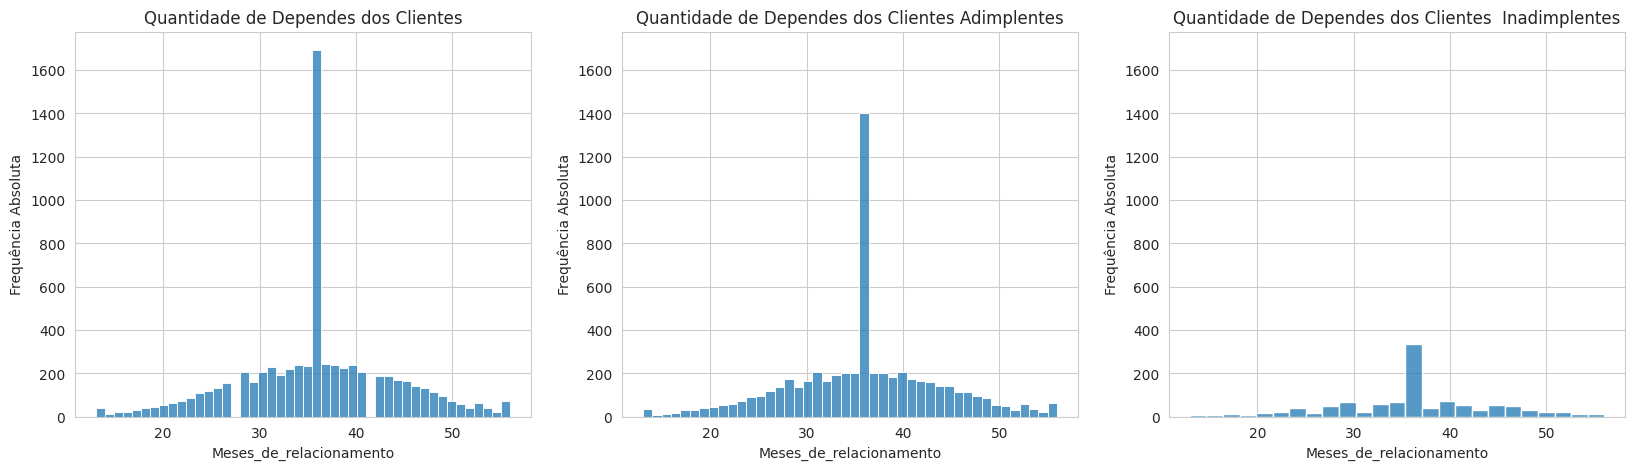

In [53]:
coluna = 'meses_de_relacionamento'
titulos = ['Quantidade de Dependes dos Clientes', 'Quantidade de Dependes dos Clientes Adimplentes', 'Quantidade de Dependes dos Clientes  Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.8 Quantidade de Produtos Contratados pelos Clientes.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


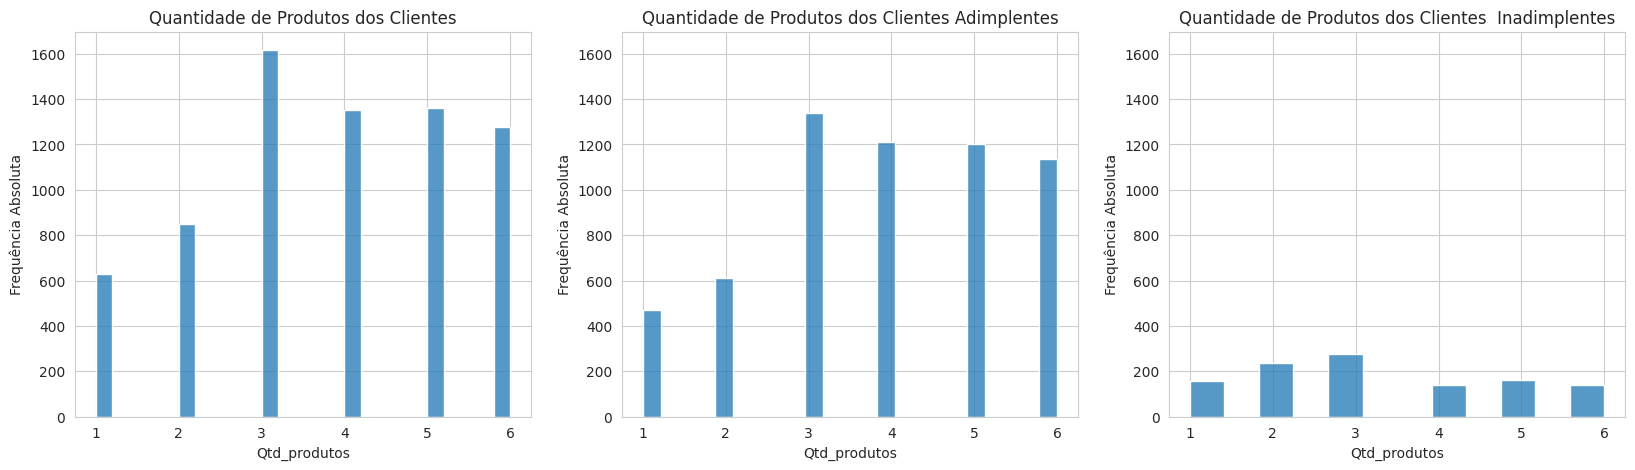

In [54]:
coluna = 'qtd_produtos'
titulos = ['Quantidade de Produtos dos Clientes', 'Quantidade de Produtos dos Clientes Adimplentes', 'Quantidade de Produtos dos Clientes  Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

### 4.2.9 Número de interações que o cliente teve com a empresa nos últimos 12 meses

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


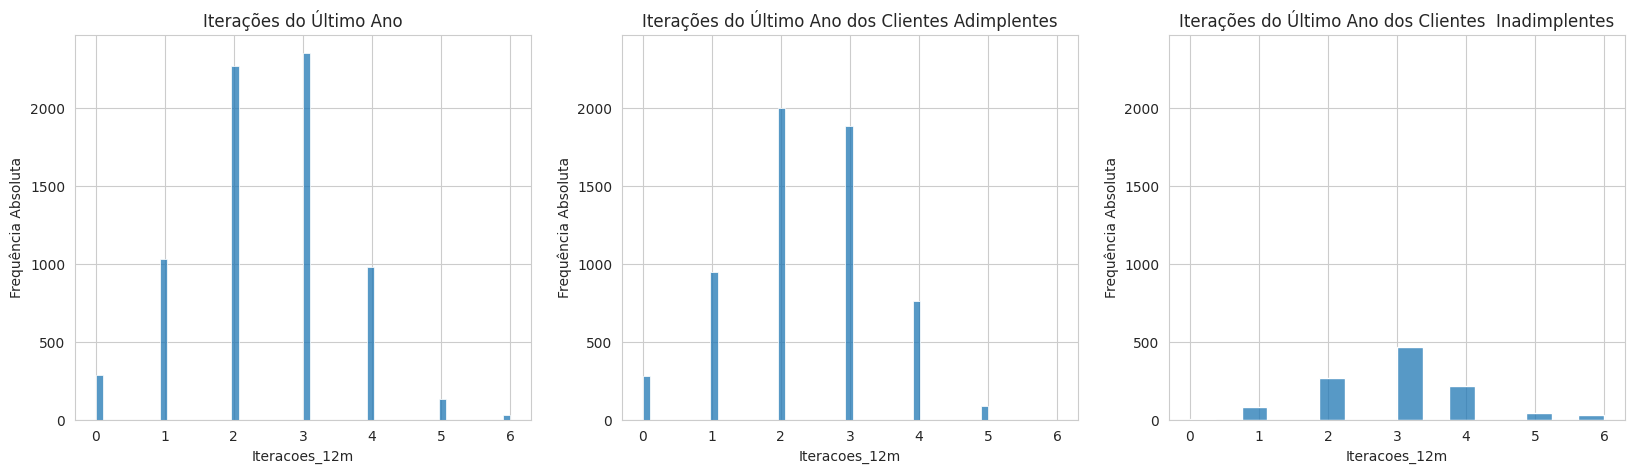

In [55]:
coluna = 'iteracoes_12m'
titulos = ['Iterações do Último Ano', 'Iterações do Último Ano dos Clientes Adimplentes', 'Iterações do Último Ano dos Clientes  Inadimplentes']


eixo = 0 
max_y = 0 
figure, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

figure.show()

## Resultado Análise Exploratória dos `Atributos Categóricos` dos Clientes

#### A análise dos atributos categóricos revela que a distribuição dos clientes inadimplentes tende a acompanhar a distribuição geral dos clientes em cada categoria, com algumas exceções relevantes.

#### Escolaridade
    A maioria dos clientes possui mestrado, e essa também é a escolaridade mais comum entre os clientes inadimplentes, indicando que um nível educacional mais alto não necessariamente está associado a menor inadimplência.

#### Faixa salarial
    A maior parte dos clientes possui um salário inferior a 40 mil, e essa mesma faixa concentra a maior parte dos inadimplentes, sugerindo que clientes com rendas mais baixas podem estar mais propensos à inadimplência.

#### Estado civil
    A categoria mais frequente é a de clientes casados, tanto entre o total de clientes quanto entre os inadimplentes, o que pode refletir o perfil demográfico predominante, sem indicar forte relação entre estado civil e inadimplência.

#### Tipo de cartão
    O tipo de cartão mais utilizado é o “Blue”, que também apresenta o maior número de inadimplentes. Isso pode estar relacionado à popularidade geral do cartão, mas vale investigar se ele é mais comum entre clientes com perfil de risco.

#### Gênero
    Embora o maior número de clientes seja do sexo masculino, a inadimplência é mais frequente entre clientes do sexo feminino, o que pode indicar uma diferença de comportamento financeiro ou condições socioeconômicas que merecem atenção.


## Análise dos `Atributos Numéricos` dos Clientes
### A seguir, apresentamos a análise dos atributos numéricos com base na distribuição observada nos histogramas. A comparação entre o total de clientes e os clientes inadimplentes revela padrões interessantes.

### uantidade de Transações (12 meses)
    Mínimo: 10 | Máximo: 134 | Média: 64
    O histograma geral apresenta crescimento até aproximadamente 50 transações, seguido de uma queda, um novo pico entre 60 e 80, e nova redução.
    Entre os clientes inadimplentes, o pico ocorre após 40 transações, com queda antes dos 50, indicando que a inadimplência pode estar mais concentrada entre clientes com volume intermediário de transações.

### Valor das Transações (12 meses)
    Mínimo: R$510 | Máximo: R$17.995 | Média: R$4.394
    O histograma é multimodal, com picos entre 0–2.500, um segundo e mais alto entre 2.600–5.800, e oscilações menores entre 7.500–10.000 e 12.500–17.500.
    A distribuição dos clientes inadimplentes segue padrão semelhante, indicando que o valor total transacionado não é um fator discriminante claro entre clientes adimplentes e inadimplentes.

### Limite de Crédito
    Mínimo: R$1.438 | Máximo: R$34.516 | Média: R$8.493
    O histograma apresenta maior concentração de clientes com limites mais baixos, com queda progressiva na frequência conforme o valor aumenta.
    Há um pico discreto na faixa mais alta de crédito, indicando um pequeno grupo com limites elevados.
    A distribuição entre os clientes inadimplentes é bastante semelhante à geral.

### Idade
    Mínimo: 26 | Máximo: 73 | Média: 46 anos
    Distribuição com formato de montanha e picos nos 35, 44 e 55 anos, com destaque para o pico aos 44 anos.
    Entre os inadimplentes, o maior pico ocorre entre 48 e 50 anos, sugerindo uma possível maior incidência de inadimplência nessa faixa etária.

### Número de Dependentes
    Mínimo: 0 | Máximo: 5 | Média: 2,34
    O histograma apresenta uma distribuição simples, com a maioria dos clientes concentrada nas faixas entre 1 e 3 dependentes.
    Os clientes inadimplentes seguem padrão semelhante, sem grandes desvios.

### Tempo de Relacionamento (em meses)
    Mínimo: 13 | Máximo: 56 | Média: 35 meses
    O histograma tem formato de montanha suave, com um pico marcante em torno de 36 meses, indicando que grande parte dos clientes está com a empresa há cerca de 3 anos.
    A distribuição dos inadimplentes segue o mesmo padrão.

### Quantidade de Produtos Contratados
    Mínimo: 1 | Máximo: 6 | Média: 3,82
    Distribuição simples, com maior concentração de clientes que possuem entre 3 e 4 produtos.
    O comportamento dos clientes inadimplentes é similar ao do conjunto geral.

### Número de Interações com a Empresa (12 meses)
    Mínimo: 0 | Máximo: 6 | Média: 2,45
    O histograma mostra picos principais nos valores 2 e 3 interações.
    Entre os clientes inadimplentes, o pico ocorre em 3 interações, enquanto os adimplentes tendem a se concentrar mais em 2.
    Esse padrão pode indicar que clientes inadimplentes entram mais em contato com a empresa, possivelmente por dificuldades ou solicitações de renegociação.